In [2]:
import pandas as pd
import numpy as np
from glob import glob

In [6]:
vishwa_samples = glob('../DataSet/Generated_music_withratings/Vishwa_p1/Song/*.wav')
vishwa_dataset = pd.DataFrame([i.split('\\')[-1].split('.wav')[0].split('_')[1:] + [i] for i in vishwa_samples], columns=['name', 'similarity', 'rating', 'path'])
vishwa_dataset['similarity'] = vishwa_dataset['similarity'].astype(float)
vishwa_dataset['rating'] = vishwa_dataset['rating'].astype(float)

## Remove everything with rating less than 0 and greater than 5
vishwa_dataset = vishwa_dataset[(vishwa_dataset['rating']>=0) & (vishwa_dataset['rating']<=5)]
## Remove all with + in the name
vishwa_dataset = vishwa_dataset[~vishwa_dataset['name'].str.contains('\+')]


ahan_samples = glob('../DataSet/Generated_music_withratings/Ahan_p1/Song/*.wav')
ahan_dataset = pd.DataFrame([i.split('\\')[-1].split('.wav')[0].split('_')[1:] + [i] for i in ahan_samples], columns=['name', 'similarity', 'rating', 'path'])
ahan_dataset['similarity'] = ahan_dataset['similarity'].astype(float)
ahan_dataset['rating'] = ahan_dataset['rating'].astype(float)

## Remove everything with rating less than 0 and greater than 5
ahan_dataset = ahan_dataset[(ahan_dataset['rating']>=0) & (ahan_dataset['rating']<=5)]
## Remove all with + in the name
ahan_dataset = ahan_dataset[~ahan_dataset['name'].str.contains('\+')]



In [7]:
ahan_dataset.groupby('name').mean().sort_values('rating', ascending=False)

,similarity,rating
name,,
22,0.866667,3.166667
lover story,0.820000,3.066667
back to december,0.664286,2.964286
cardigan,0.830000,2.900000
lover,0.758333,2.833333
willow,0.757143,2.821429
you belong with me,0.850000,2.750000
blank space,0.750000,2.666667
anti hero,0.800000,2.214286


In [8]:
vishwa_dataset.groupby('name').mean().sort_values('rating', ascending=False)

,similarity,rating
name,,
22,0.733333,3.611111
you belong with me,0.753846,3.423077
lover story,0.792308,3.000000
lover,0.668182,2.409091
blank space,0.827273,2.318182
back to december,0.835000,2.250000
anti hero,0.777778,2.055556
cardigan,0.266667,1.833333
willow,0.775000,1.791667


## Collecting samples

In [9]:
import shutil
save_dir = '../DataSet/Generated_music_withratings/training_samples/'

In [10]:
## Extract songs with rating greater than 75 percentile of each song
dfs_vis = []
for name in vishwa_dataset['name'].unique():
    temp = vishwa_dataset[vishwa_dataset['name']==name]
    temp = temp[temp['rating']>=temp['rating'].quantile(0.75)]
    dfs_vis.append(temp)

## Extract songs with rating greater than 75 percentile of each song
dfs_ahan = []
for name in ahan_dataset['name'].unique():
    temp = ahan_dataset[ahan_dataset['name']==name]
    temp = temp[temp['rating']>=temp['rating'].quantile(0.75)]
    dfs_ahan.append(temp)

training_samples = pd.concat([pd.concat(dfs_ahan), pd.concat(dfs_vis)])

In [15]:
## Calculate percentage of names in training samples
percentage = training_samples['name'].value_counts()/len(training_samples)


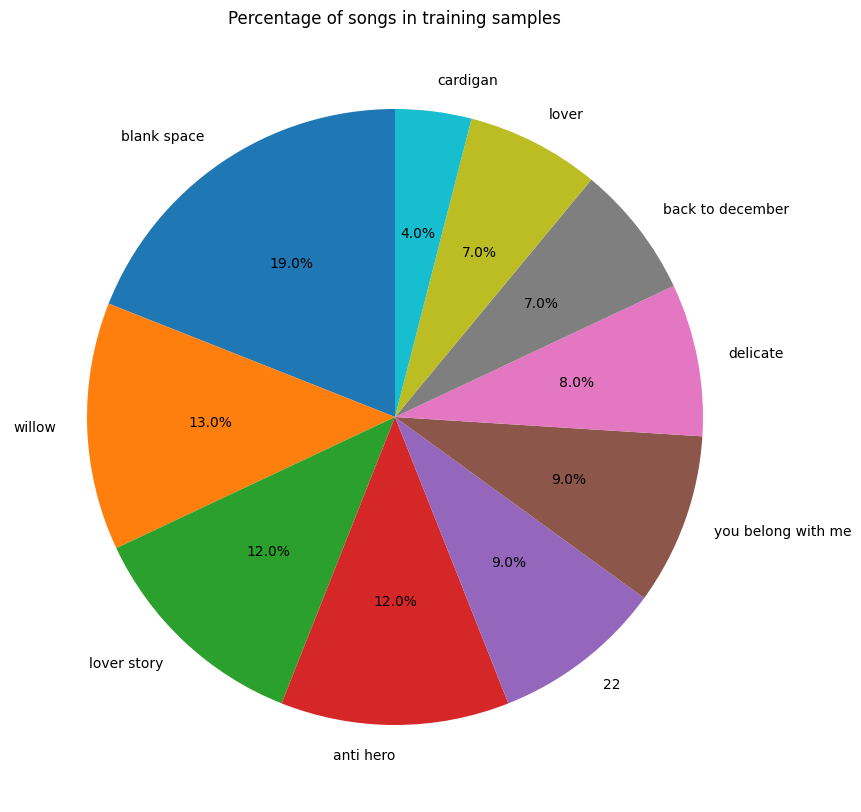

In [17]:
## Plot a pie chart of the percentage of songs in training samples
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.pie(percentage.values, labels=percentage.index, autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Percentage of songs in training samples')
plt.show()


In [24]:
## Move every song to the training samples folder
for n,p in zip(training_samples['name'],training_samples['path']):
    files_in_dir = len(glob(save_dir+'*'))
    shutil.copy(p, save_dir+f'{files_in_dir}_{n}.wav')


In [22]:
## load every song in D:\Projects\Orpheus_ai\DataSet\ts_db_separated\accompaniment

songs = glob('../DataSet/ts_db_separated/accompaniment/*')

In [31]:
import librosa
import soundfile as sf

In [32]:
for s in songs:
    ## Get the name
    name = s.split('\\')[-1].split('_')[0]

    ## Read s
    s, sr = librosa.load(s, sr=20500)

    ## Divide the song into 5 second chunks and save them
    for i in range(0, len(s), 102500):
        files_in_dir = len(glob(save_dir+'*'))
        sf.write(save_dir+f'{files_in_dir}_{name}.wav', s[i:i+102500], sr)

### SONG RECOVERY!! 

In [87]:
import audiodiffusion
import soundfile as sf
from tqdm.notebook import tqdm

In [63]:
audio_diffusion = audiodiffusion.AudioDiffusionPipeline.from_pretrained("teticio/latent-audio-diffusion-256").to('cuda')
spec = glob('../DataSet/Generated_music_withratings/Vishwa/Spec/*')

unet\diffusion_pytorch_model.safetensors not found


In [88]:
## Convert all spectrograms to audio and move them to '../DataSet/Generated_music_withratings/Vishwa/Song/'
from PIL import Image
for i in tqdm(spec):
    ## Read I with pillow
    name = i.split('\\')[-1].split('.npy')[0]
    spectrogram = np.load(i)
    spectrogram = Image.fromarray(spectrogram)
    audio = audio_diffusion.mel.image_to_audio(spectrogram)

    sf.write(f'../DataSet/Generated_music_withratings/Vishwa/Song/{name}.wav', audio, 22050)
    '../DataSet/Generated_music_withratings/Vishwa/Song/'



  0%|          | 0/110 [00:00<?, ?it/s]

In [82]:
## Play audio
import IPython.display as ipd
ipd.Audio(audio, rate=22050)